Import bibliotek + import bazy danych z pliku csv + czyszczenie pustych obserwacji.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.ticker import MultipleLocator

table = pd.read_csv('HRDataset.csv')

table = table.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1)
table.dropna(thresh=2, inplace=True)

1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
        12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 [Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12'),
  Text(0, 13.0, '13'),
  Text(0, 14.0, '14'),
  Text(0, 15.0, '15'),
  Text(0, 16.0, '16'),
  Text(0, 17.0, '17'),
  Text(0, 18.0, '18'),
  Text(0, 19.0, '19'),
  Text(0, 20.0, '20'),
  Text(0, 21.0, '21'),
  Text(0, 22.0, '22'),
  Text(0, 23.0, '23'),
  Text(0, 24.0, '24')])

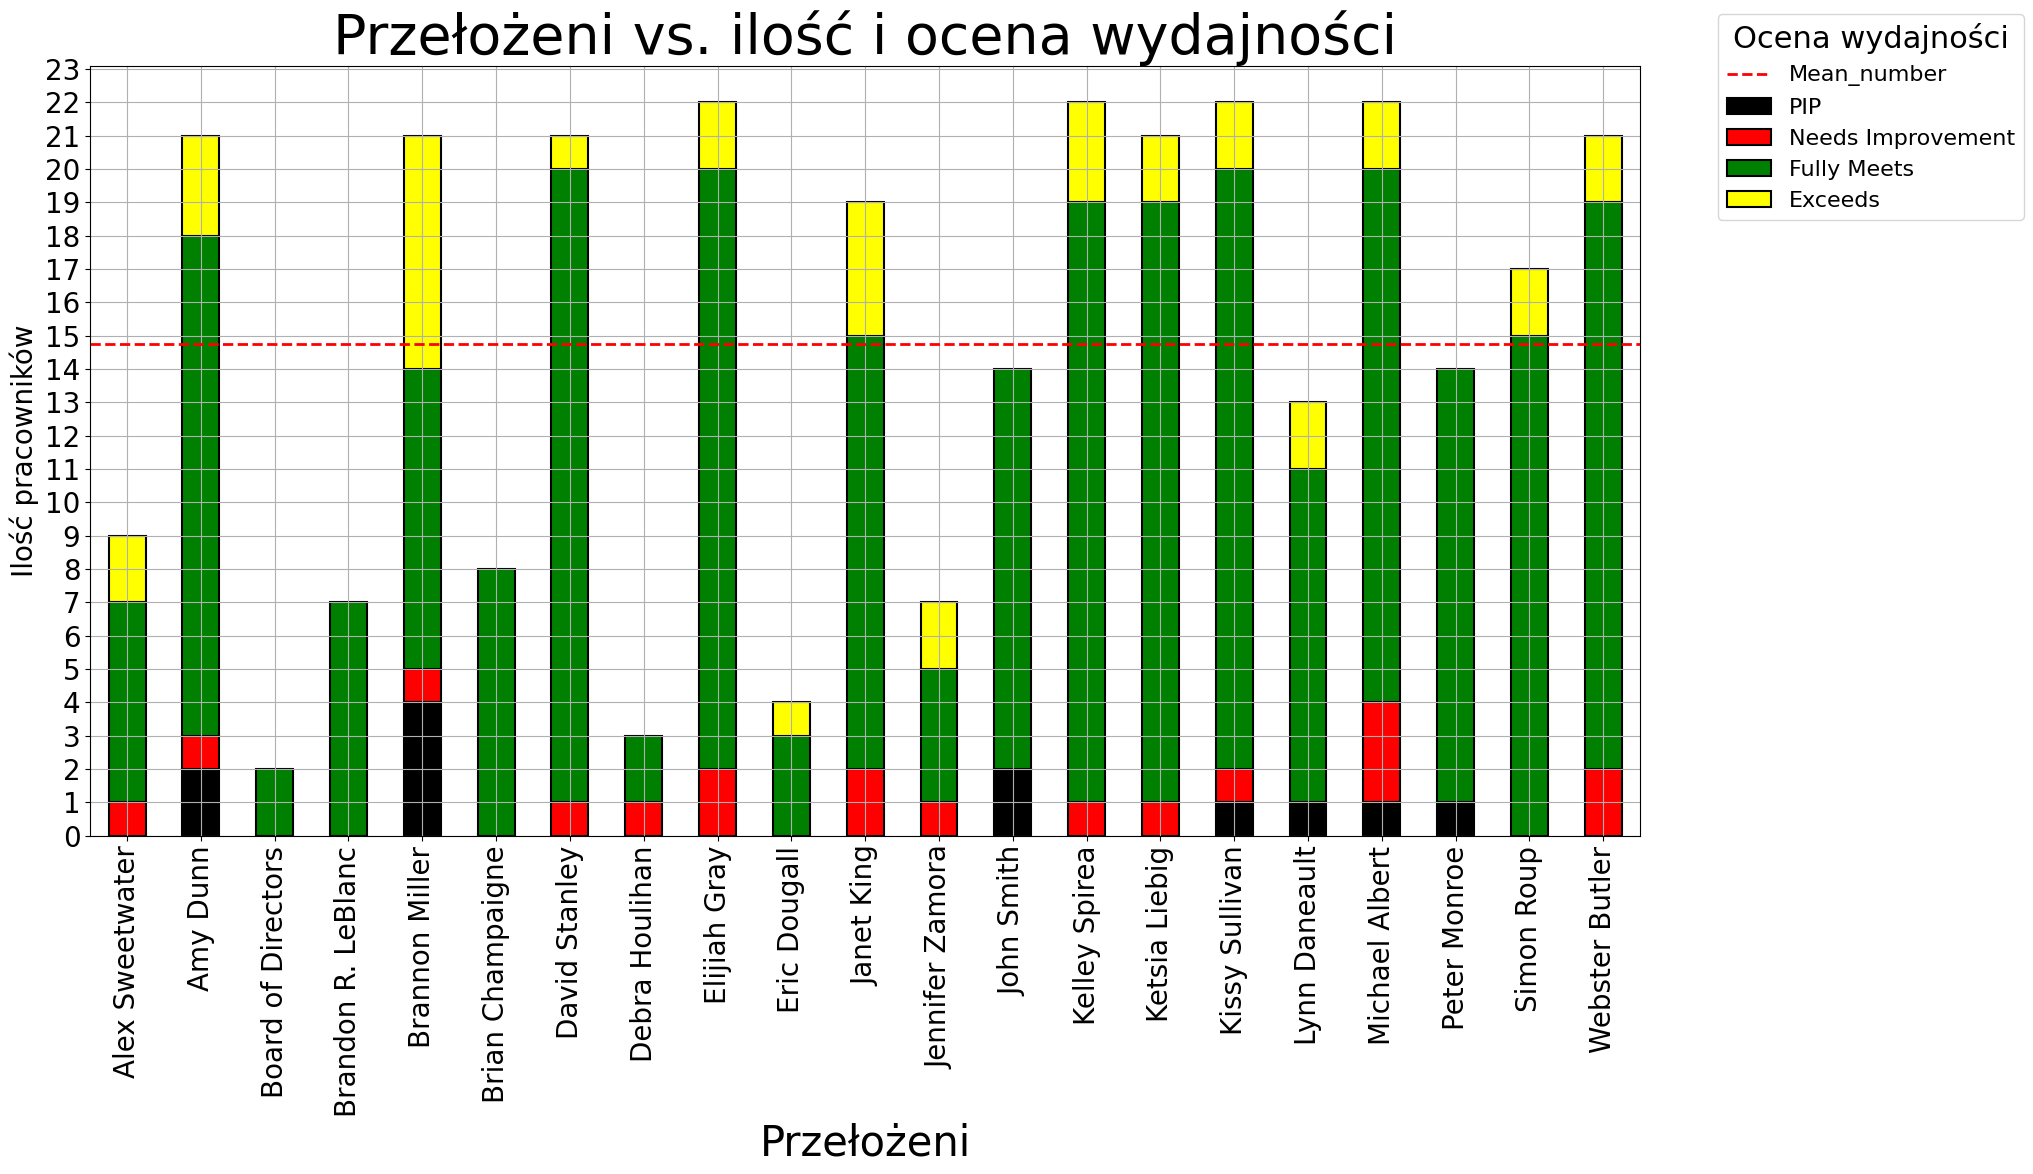

In [53]:
PerformanceScore_Grade = {
    'PIP':1,
    'Needs Improvement':2,
    'Fully Meets':3,
    'Exceeds':4    
}

table['PerformanceScore_Grade'] = table['PerformanceScore'].map(PerformanceScore_Grade)

mean_number_of_subordinates = table['ManagerName'].value_counts().mean().round(2)
table_emp_rate = pd.crosstab(table['ManagerName'],table['PerformanceScore_Grade'])

table_emp_rate.plot(
    kind='bar',
    stacked=True,
    figsize=(20, 10),
    color=['black', 'red', 'green', 'yellow'],
    edgecolor='black',
    linewidth=1.5)

plt.axhline(y=mean_number_of_subordinates, color='red', linestyle='--', linewidth=2, label=f'Średnia liczba podwładnych: {mean_number_of_subordinates}')
plt.grid(True)
new_labels = ['Mean_number','PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds']
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
plt.legend(title='Ocena wydajności', labels=new_labels,loc=(1.05,.8),fontsize=16,title_fontsize=22)
plt.title('Przełożeni vs. ilość i ocena wydajności', size=40)
plt.xlabel('Przełożeni', size=30)
plt.ylabel('Ilość pracowników', size=20)
plt.xticks(size=20)
plt.yticks(size=20)

Wnioski: Nie dostrzegam zależności. Rozkład ilości pracowników o różnych ocenach wydajności jest bardzo podobna biorąc pod uwagę przełożonych posiadających ilość pracowników powyżej średniej.

2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

2.1. Dodajemy kolumną staż pracy ['Seniority']:

In [54]:
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    return round((end_date - row['DateofHire']).days / 365.25, 2)

table['DateofTermination'] = pd.to_datetime(table['DateofTermination'],format='%m/%d/%y')
table['DateofHire'] = pd.to_datetime(table['DateofHire'],format='%m/%d/%Y')

table['Seniority'] = table.apply(lambda row: count_seniority(row), axis=1)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,PerformanceScore_Grade,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,3,10.92
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,3,5.72
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,3,4.99
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,3,0.16
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,3,4.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,3,4.88
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,3,4.88
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,3,3.24
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,3,4.88


2.2. Ograniczamy próbę do źródeł, które spełniają jednocześnie dwa warunki: ilość rekrutacji powyżej 1 kwartyla i średni czas pracy dla źródła wyższy, niż średni czas pracy dla wszystkich źródeł. 

In [59]:
# Określamy jeden warunek - źródła rekrutacji muszą mieć ilość rekrutacji powyżej 1 kwartyla: 
recruitment_source_counts = table['RecruitmentSource'].value_counts()
q1 = recruitment_source_counts.quantile(0.25)
table_RecruitmentSource_q1 = recruitment_source_counts[recruitment_source_counts > q1]

# Określamy drugi warunek - źródła rekrutacji muszą mieć 'Seniority' powyżej średniej ogólnej:
seniority_mean = table['Seniority'].mean()
table_RecruitmentSource_mean_group = table.groupby('RecruitmentSource')['Seniority'].mean()
table_RecruitmentSource_mean_group = table_RecruitmentSource_mean_group[table_RecruitmentSource_mean_group>seniority_mean]

# Połączenie dwóch warunków w jedne 'condition':
condition = table_RecruitmentSource_q1.index.intersection(table_RecruitmentSource_mean_group.index)

# Stworzenie DB spełniającego powyższe dwa warunki:
table_condition = table[table['RecruitmentSource'].isin(condition)]

2.3. Rysujemy wykres boxplot:

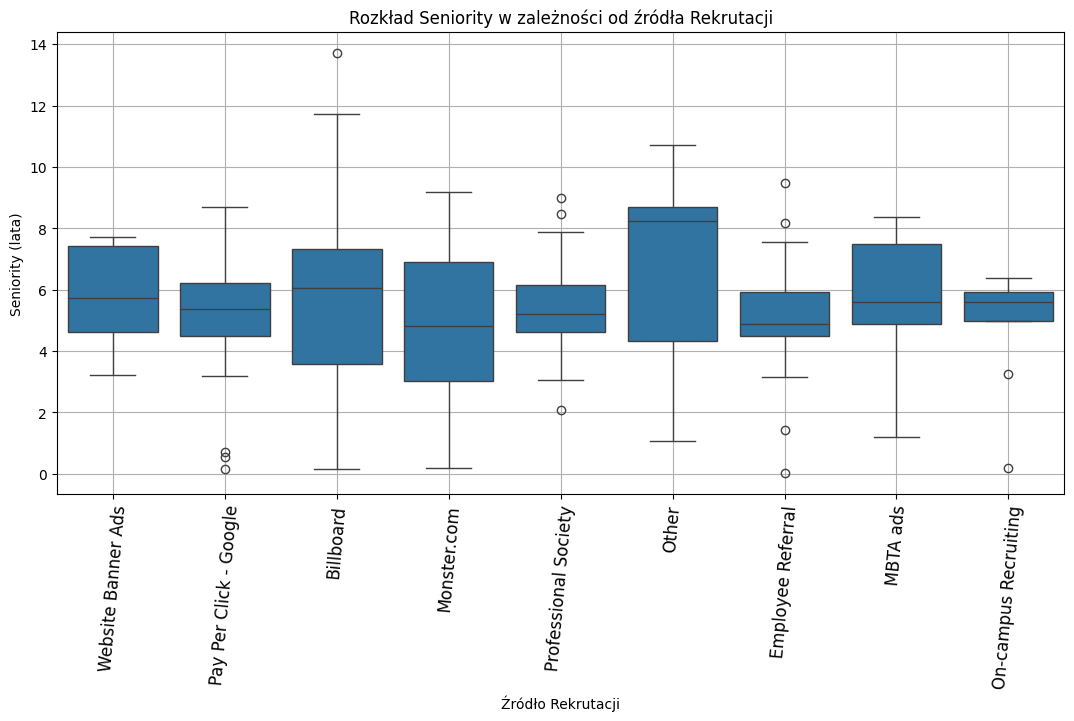

In [60]:
plt.figure(figsize=(13, 6)) 
sns.boxplot(x='RecruitmentSource', y='Seniority', data=table_condition)
plt.xticks(fontsize=12, rotation=85)
plt.title('Rozkład Seniority w zależności od źródła Rekrutacji')
plt.xlabel('Źródło Rekrutacji')
plt.ylabel('Seniority (lata)')
plt.grid(True)

Wnioski: Biorąc pod uwagę, że poniższy wykres ogranicza się do źródeł rekrutacji które spełniają dwa warunki, czyli ilość rekrutacji wynosi więcej, niż 1 kwartyl oraz średnia długości pracy dla źródeł jest większa niż średnia ogólna to nie jesteśmy w stanie określić jednoznaczenie, które źródło rekrutacji jest najlepsze pod względem rekrutacji oceniająch je pod względem długości czasu pracy. Jednym z lepszych źródeł rekrutacji pod tym zwględem jest źródło 'Other', być może to wynika z tego, że jest to rekrutacja osób z polecenia, jednak to źródło nie ma zbyt wielu ilości rekrutacji, więc dane mogą być mylące. Jeśli miałbym wybrać dwa źródła które bym polecił na bazie wykresu to wybrałbym 'Webside Banner Ads' oraz 'Professional Society', ponieważ nie posiadają rekrutacji które kończyły by się krótką współpracą, a typowe najkrótsze współprace kończyły się po około 3 latach, co jest bardzo dobrym wynikiem.

3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

In [64]:
table_pivot = table.pivot_table(index='MaritalDesc', columns='EmpSatisfaction', values='EmpID', aggfunc='count',fill_value=0)
table_pivot['Total'] = table_pivot.sum(axis=1)
display(table_pivot)

EmpSatisfaction,1.0,2.0,3.0,4.0,5.0,Total
MaritalDesc,,,,,,
Divorced,0,1,6,14,9,30
Married,0,5,54,31,33,123
Separated,1,0,4,2,5,12
Single,1,3,44,40,49,137
Widowed,0,0,0,6,2,8


3.1 Ze zględy na zbyt małą reprezentację 'Separated', 'Widowed' nie bieżemy jej pod uwagę.

In [65]:
table_adjust = table[~table['MaritalDesc'].isin(['Separated', 'Widowed'])]

3.2. Rysujemy wykres rozkładu ocen satysfakcji pracowników z podziałem na stan cywilny.

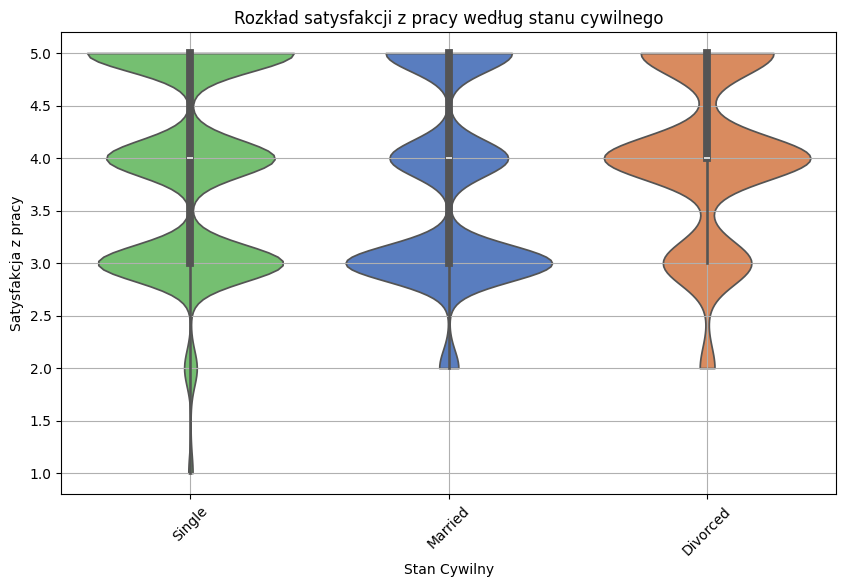

In [66]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='MaritalDesc', 
    y='EmpSatisfaction', 
    data=table_adjust,
    bw_adjust=0.5,
    order=['Single', 'Married', 'Divorced'],
    cut=0,
    density_norm='count',
    hue='MaritalDesc',
    palette='muted',
    legend=False
    )

plt.title('Rozkład satysfakcji z pracy według stanu cywilnego')
plt.xlabel('Stan Cywilny')
plt.ylabel('Satysfakcja z pracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Wnioski: Z analizy zostały wyłączone grupy: separated i widowed, ponieważ próba dla tych dwóch grup jest zbyt mała, aby poddawać je analizie. Trzy pozostałe grupy do single, married i divorced. W gruncie rzeczy próba dla grupy single i married jest bardzo podobna i stosunkowo spora, więc porównywanie tych dwóch grup do siebie ma największy sens. Obie te grupy charakteryzują się stosunkowo równomiernym rozkładem ocen, między oceną 3 a 5, i bardzo mają ilością ocen 1 i 2, w przypadku grupy married brak oceny '1'. Największą ilość ocen dla grupy single to maksymalna ocena '5', natomiast największa ilość oceny w przypadku married to '3', a w przypadku divorce to ocena '4'. Zmiana stanu cywilnego w niewielkim stopniu koreluje z preferencjami co do oceny satysfakcji z pracy.

4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

4.1. Wyliczamy wiek pracownika.

In [67]:
def count_age(row):
    end_date = dt.datetime(2019,9,27)
    return round((end_date - row['DOB']).days / 365.25, 2)


table['DOB'] = pd.to_datetime(table['DOB'],format='%m/%d/%y')
today = pd.Timestamp('today')
table['DOB'] = table['DOB'].apply(lambda d: d - pd.DateOffset(years=100) if d > today else d)

table['Age'] = table.apply(lambda row: count_age(row), axis=1)

display(table[['DOB', 'Age']])

,DOB,Age
0,1987-11-24,31.84
1,1984-04-26,35.42
2,1986-09-01,33.07
3,1985-09-16,34.03
4,1988-05-19,31.36
...,...,...
305,1952-01-18,67.69
306,1986-04-23,33.43
307,1983-02-09,36.63
308,1965-09-09,54.05


4.2. Rysujemy histogram.

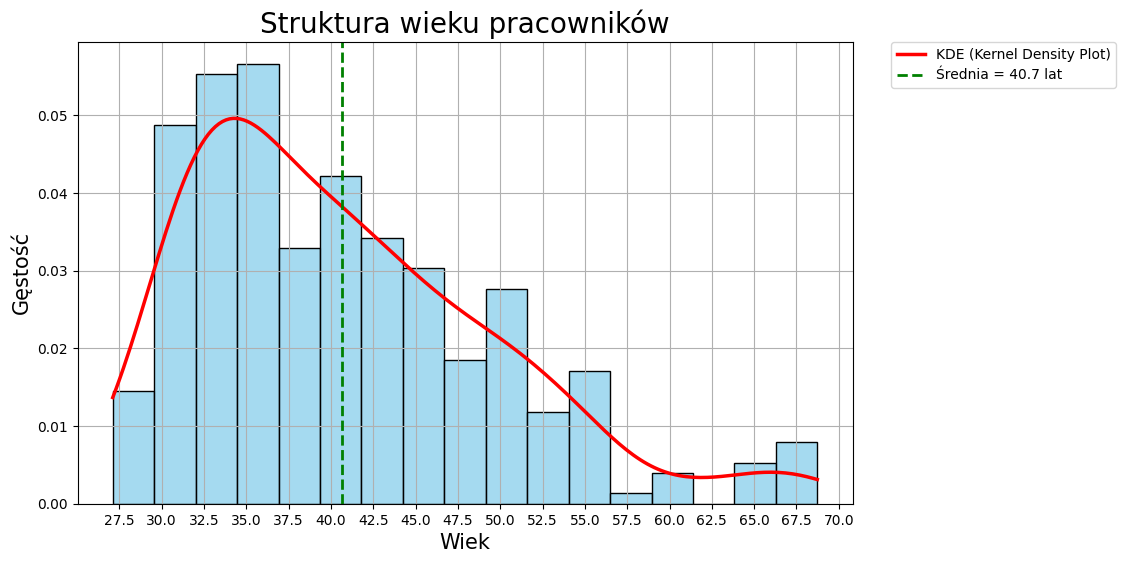

In [68]:
mean_age = table['Age'].mean().round(2)

plt.figure(figsize=(10, 6))

sns.histplot(
    data=table,
    x='Age',
    bins=20,
    kde=False,
    stat='density',
    binwidth=2.5,
    color='skyblue'
)

sns.kdeplot(
    data=table,
    x='Age',
    color='red',
    linewidth=2.5,
    cut=0,
    label=f'KDE (Kernel Density Plot)'
)

plt.axvline(
    x=mean_age,
    color='green',
    linestyle='--',   # przerywana linia
    linewidth=2,
    label=f'Średnia = {mean_age:.1f} lat'
)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2.5))

plt.title('Struktura wieku pracowników', size=20)
plt.xlabel('Wiek', size=15)
plt.ylabel('Gęstość', size=15)
plt.grid(True)
plt.legend(loc=(1.05,.9))
plt.show()

Wnioski: Struktra wieku pracowników w firmie obrazuje że największa ilość osób to pracownicy w wieku około 35 lat, przy ogólnej średniej wieku 40,7 lat. Tendencja ilości osób do okolic 35 roku życia jest rosnąca, natomiast po niej następuje tendencja malejąca do około 60 roku życia, gdzie następuje wypłaszczenie trendu.

5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [70]:
def which_group_has_more_special_projects(sum_special_projects_older_employers, sum_special_projects_younger_employers):
    if sum_special_projects_older_employers == sum_special_projects_younger_employers:
        return print(f'Obie grupy mają tyle samo projektów = czyli {sum_special_projects_older_employers} projektów.')
    elif sum_special_projects_older_employers > sum_special_projects_younger_employers:
        return print(f'Grupa starszych pracowników posiada {sum_special_projects_older_employers} projektów, czyli więcej niż grupa młodych która posiada {sum_special_projects_younger_employers} projektów.')
    else:
        return print(f'Grupa młodszych pracowników posiada {sum_special_projects_younger_employers} projektów, czyli więcej niż grupa starsza która posiada {sum_special_projects_older_employers} projektów.')

table_older_employers = table[table['Age']>mean_age]
table_younger_employers = table[table['Age']<=mean_age]
sum_special_projects_older_employers = table_older_employers['SpecialProjectsCount'].sum()
sum_special_projects_younger_employers = table_younger_employers['SpecialProjectsCount'].sum()

print("Wnioski")
print(f"Założenia - grup pracowników starszych to grupa pracowników, powyżej średniej wieku w firmie, czyli {mean_age} lat.")
which_group_has_more_special_projects(sum_special_projects_older_employers, sum_special_projects_younger_employers)

Wnioski
Założenia - grup pracowników starszych to grupa pracowników, powyżej średniej wieku w firmie, czyli 40.67 lat.
Grupa młodszych pracowników posiada 266.0 projektów, czyli więcej niż grupa starsza która posiada 109.0 projektów.
